# Exploratory Data Analysis for EHR Dataset

In [1]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset

In [2]:
df = pd.read_csv('/data/raw/ehr-transformer/csvs/aggregated-00.csv')

In [3]:
df.head()

,"""encounter_time_elapsed""",encounter_source_surrogate_pkey,patient_id,resulted_at,resulted_at_tz,first_test_resulted_at,first_test_resulted_at_tz,time_elapsed_in_min,ALBUMIN,ALKALINE_PHOSPHATASE,...,TOTAL_PROTEIN,WBC,has_icu_event,hospital_los_hours,inpatient_los_hours,emergency_los_hours,icu_los_hours,discharge_disposition,department_name,level_of_care
0,66061689941-0.0,66061689941,Z3345622,2020-10-06 01:21:00,-05:00,2020-10-06 01:21:00,-05:00,0.0,NaN,NaN,...,NaN,4.8,False,29,29.0,NaN,NaN,Home Routine,UCI DH32 ORTHOPAEDICS,MedSurg (No cardiac monitoring)
1,66061689941-4.0,66061689941,Z3345622,2020-10-06 01:25:00,-05:00,2020-10-06 01:21:00,-05:00,4.0,NaN,NaN,...,NaN,NaN,False,29,29.0,NaN,NaN,Home Routine,UCI DH32 ORTHOPAEDICS,MedSurg (No cardiac monitoring)
2,66063320107-0.0,66063320107,Z4358944,2020-10-08 01:09:00,-05:00,2020-10-08 01:09:00,-05:00,0.0,NaN,NaN,...,NaN,8.9,False,73,73.0,NaN,NaN,Home Routine,UCI DH32 ORTHOPAEDICS,MedSurg (No cardiac monitoring)
3,66063320107-16.0,66063320107,Z4358944,2020-10-08 01:25:00,-05:00,2020-10-08 01:09:00,-05:00,16.0,NaN,NaN,...,NaN,NaN,False,73,73.0,NaN,NaN,Home Routine,UCI DH32 ORTHOPAEDICS,MedSurg (No cardiac monitoring)
4,66064469783-0.0,66064469783,Z5318141,2020-10-26 06:46:00,-05:00,2020-10-26 06:46:00,-05:00,0.0,NaN,NaN,...,NaN,4.5,False,52,52.0,NaN,NaN,Home Routine,UCI DH56 NEUROSTEPDOWN,IMU/Stepdown


## Inspect dataset

In [4]:
# --- Print dataframe information
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94238 entries, 0 to 94237
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   "encounter_time_elapsed"         94238 non-null  object 
 1   encounter_source_surrogate_pkey  94238 non-null  int64  
 2   patient_id                       94238 non-null  object 
 3   resulted_at                      94238 non-null  object 
 4   resulted_at_tz                   94238 non-null  object 
 5   first_test_resulted_at           94238 non-null  object 
 6   first_test_resulted_at_tz        94238 non-null  object 
 7   time_elapsed_in_min              94238 non-null  float64
 8   ALBUMIN                          18046 non-null  float64
 9   ALKALINE_PHOSPHATASE             18061 non-null  float64
 10  ALT                              17978 non-null  float64
 11  ANION_GAP                        49360 non-null  float64
 12  AST               

In [5]:
# --- Get NaN statistics
df.isnull().sum()

"encounter_time_elapsed"               0
encounter_source_surrogate_pkey        0
patient_id                             0
resulted_at                            0
resulted_at_tz                         0
first_test_resulted_at                 0
first_test_resulted_at_tz              0
time_elapsed_in_min                    0
ALBUMIN                            76192
ALKALINE_PHOSPHATASE               76177
ALT                                76260
ANION_GAP                          44878
AST                                76343
BICARB                             44872
BUN                                44887
CALCIUM                            44886
CHLORIDE                           44873
CREATININE                         44936
GLUCOSE                            44873
GFR_AFRICAN_AMERICAN               81156
GFR_NON_AFRICAN_AMERICAN           78122
HEMATOCRIT                         49114
HEMOGLOBIN                         49114
MCH                                49114
MCHC            

In [6]:
# --- Get dataset statistics, excludes NaN
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_source_surrogate_pkey,94238.0,6.607937e+10,2.577944e+06,6.606169e+10,6.607746e+10,6.607935e+10,6.608096e+10,6.608515e+10
time_elapsed_in_min,94238.0,9.046991e+03,1.366650e+04,0.000000e+00,1.114000e+03,4.109000e+03,1.117400e+04,1.938840e+05
ALBUMIN,18046.0,3.285055e+00,6.373495e-01,1.500000e+00,2.800000e+00,3.300000e+00,3.700000e+00,5.500000e+00
ALKALINE_PHOSPHATASE,18061.0,1.035057e+02,9.335342e+01,9.000000e+00,5.900000e+01,7.900000e+01,1.130000e+02,1.641000e+03
ALT,17978.0,5.291829e+01,1.836181e+02,3.000000e+00,1.300000e+01,2.300000e+01,4.400000e+01,7.183000e+03
ANION_GAP,49360.0,8.476276e+00,3.573836e+00,0.000000e+00,6.000000e+00,8.000000e+00,1.000000e+01,6.400000e+01
AST,17895.0,5.894607e+01,2.657175e+02,3.000000e+00,1.700000e+01,2.600000e+01,4.500000e+01,1.053800e+04
BICARB,49366.0,2.527102e+01,4.668930e+00,2.000000e+00,2.300000e+01,2.500000e+01,2.800000e+01,5.800000e+01
BUN,49351.0,2.775707e+01,2.397060e+01,2.000000e+00,1.200000e+01,1.900000e+01,3.400000e+01,2.120000e+02
CALCIUM,49352.0,8.540067e+00,8.157558e-01,4.100000e+00,8.000000e+00,8.600000e+00,9.000000e+00,1.960000e+01


***

Question: how should we handle NaN values or unavailable diagnostic readings?

***

### Extract numerical features from dataset

In [7]:
def is_object(col):
    return col.dtype == 'O'

def is_bool(col):
    return col.dtype == 'bool'

In [8]:
# --- Cleaned dataset using only numerical features
ft = df.drop(columns=[k for k in df if is_object(df[k])])
ft[[k for k in df if is_bool(df[k])]] *= 1

In [9]:
ft.head()

,encounter_source_surrogate_pkey,time_elapsed_in_min,ALBUMIN,ALKALINE_PHOSPHATASE,ALT,ANION_GAP,AST,BICARB,BUN,CALCIUM,...,RDW-CV,SODIUM,TOTAL_BILIRUBIN,TOTAL_PROTEIN,WBC,has_icu_event,hospital_los_hours,inpatient_los_hours,emergency_los_hours,icu_los_hours
0,66061689941,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.8,NaN,NaN,NaN,4.8,0,29,29.0,NaN,NaN
1,66061689941,4.0,NaN,NaN,NaN,7.0,NaN,23.0,21.0,8.1,...,NaN,139.0,NaN,NaN,NaN,0,29,29.0,NaN,NaN
2,66063320107,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.9,NaN,NaN,NaN,8.9,0,73,73.0,NaN,NaN
3,66063320107,16.0,NaN,NaN,NaN,5.0,NaN,29.0,11.0,9.0,...,NaN,134.0,NaN,NaN,NaN,0,73,73.0,NaN,NaN
4,66064469783,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.5,NaN,NaN,NaN,4.5,0,52,52.0,NaN,NaN


### Plot dataset

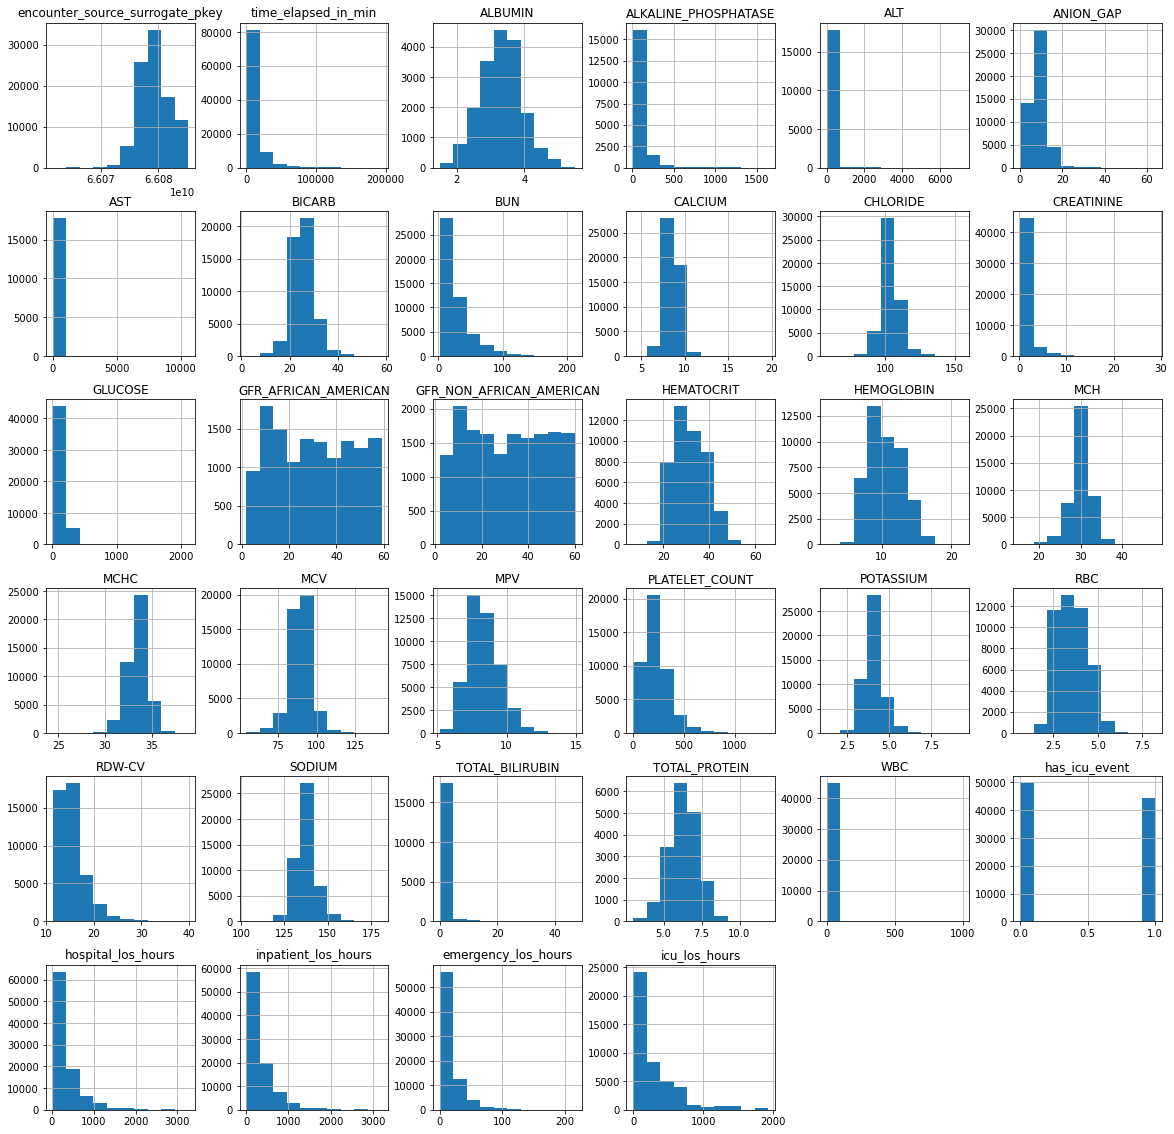

In [10]:
# --- Plot of numerical features
_ = ft.hist(figsize=(20, 20))

### Scale data

The features of the current dataset seem to be on different scales which can be problematic. 

***

Question: how should we go about normalizing the data? Also which features to consider normalizing?

***

In [11]:
# --- Makes less sense clinically, but could be good algorithmically?
def zero_mean_norm(x):
    return (x - x.mean()) / x.std()

def max_norm(x):
    return x / x.max()

In [12]:
ft_norm = copy.deepcopy(ft)
ft_max  = copy.deepcopy(ft)

for feature in ft.columns:
    ft_norm[feature] = zero_mean_norm(ft_norm[feature])
    ft_max[feature] = max_norm(ft_max[feature])

In [13]:
ft_norm.head()

,encounter_source_surrogate_pkey,time_elapsed_in_min,ALBUMIN,ALKALINE_PHOSPHATASE,ALT,ANION_GAP,AST,BICARB,BUN,CALCIUM,...,RDW-CV,SODIUM,TOTAL_BILIRUBIN,TOTAL_PROTEIN,WBC,has_icu_event,hospital_los_hours,inpatient_los_hours,emergency_los_hours,icu_los_hours
0,-6.857791,-0.661983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.999116,NaN,NaN,NaN,-0.348513,-0.947003,-0.841695,-0.839797,NaN,NaN
1,-6.857791,-0.661690,NaN,NaN,NaN,-0.413079,NaN,-0.486410,-0.281890,-0.539460,...,NaN,0.273131,NaN,NaN,NaN,-0.947003,-0.841695,-0.839797,NaN,NaN
2,-6.225440,-0.661983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.605552,NaN,NaN,NaN,-0.116436,-0.947003,-0.720601,-0.719885,NaN,NaN
3,-6.225440,-0.660812,NaN,NaN,NaN,-0.972702,NaN,0.798681,-0.699067,0.563812,...,NaN,-0.558298,NaN,NaN,NaN,-0.947003,-0.720601,-0.719885,NaN,NaN
4,-5.779474,-0.661983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.748666,NaN,NaN,NaN,-0.365494,-0.947003,-0.778396,-0.777116,NaN,NaN


In [14]:
ft_max.head()

,encounter_source_surrogate_pkey,time_elapsed_in_min,ALBUMIN,ALKALINE_PHOSPHATASE,ALT,ANION_GAP,AST,BICARB,BUN,CALCIUM,...,RDW-CV,SODIUM,TOTAL_BILIRUBIN,TOTAL_PROTEIN,WBC,has_icu_event,hospital_los_hours,inpatient_los_hours,emergency_los_hours,icu_los_hours
0,0.999645,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.321608,NaN,NaN,NaN,0.004837,0.0,0.008907,0.009040,NaN,NaN
1,0.999645,0.000021,NaN,NaN,NaN,0.109375,NaN,0.396552,0.099057,0.413265,...,NaN,0.767956,NaN,NaN,NaN,0.0,0.008907,0.009040,NaN,NaN
2,0.999670,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.349246,NaN,NaN,NaN,0.008968,0.0,0.022420,0.022756,NaN,NaN
3,0.999670,0.000083,NaN,NaN,NaN,0.078125,NaN,0.500000,0.051887,0.459184,...,NaN,0.740331,NaN,NaN,NaN,0.0,0.022420,0.022756,NaN,NaN
4,0.999687,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.339196,NaN,NaN,NaN,0.004534,0.0,0.015971,0.016209,NaN,NaN


### Replace NaN values with numerical values

Some experimental lab values are missing, one way to go about this is to replace the NaNs with the average of each feature. **One thing to be wary of when doing this is correlation.**

We will try this on the three features sets from above, namely:
* ft      (original)
* ft_norm (mean std. norm)
* ft_max  (max norm)

In [15]:
def replace_nan_with_values(ft, func):
    ft_new = copy.deepcopy(ft)
    
    for feature in ft_new.columns:
        ft_new[feature].fillna(func(ft_new[feature]), inplace=True)
    
    return ft_new

In [16]:
# --- Replace NaN values with the mean of each feature
fts = {
    'ft': replace_nan_with_values(ft, np.mean),
    'ft_norm': replace_nan_with_values(ft_norm, np.mean),
    'ft_max':  replace_nan_with_values(ft_max, np.mean),
}

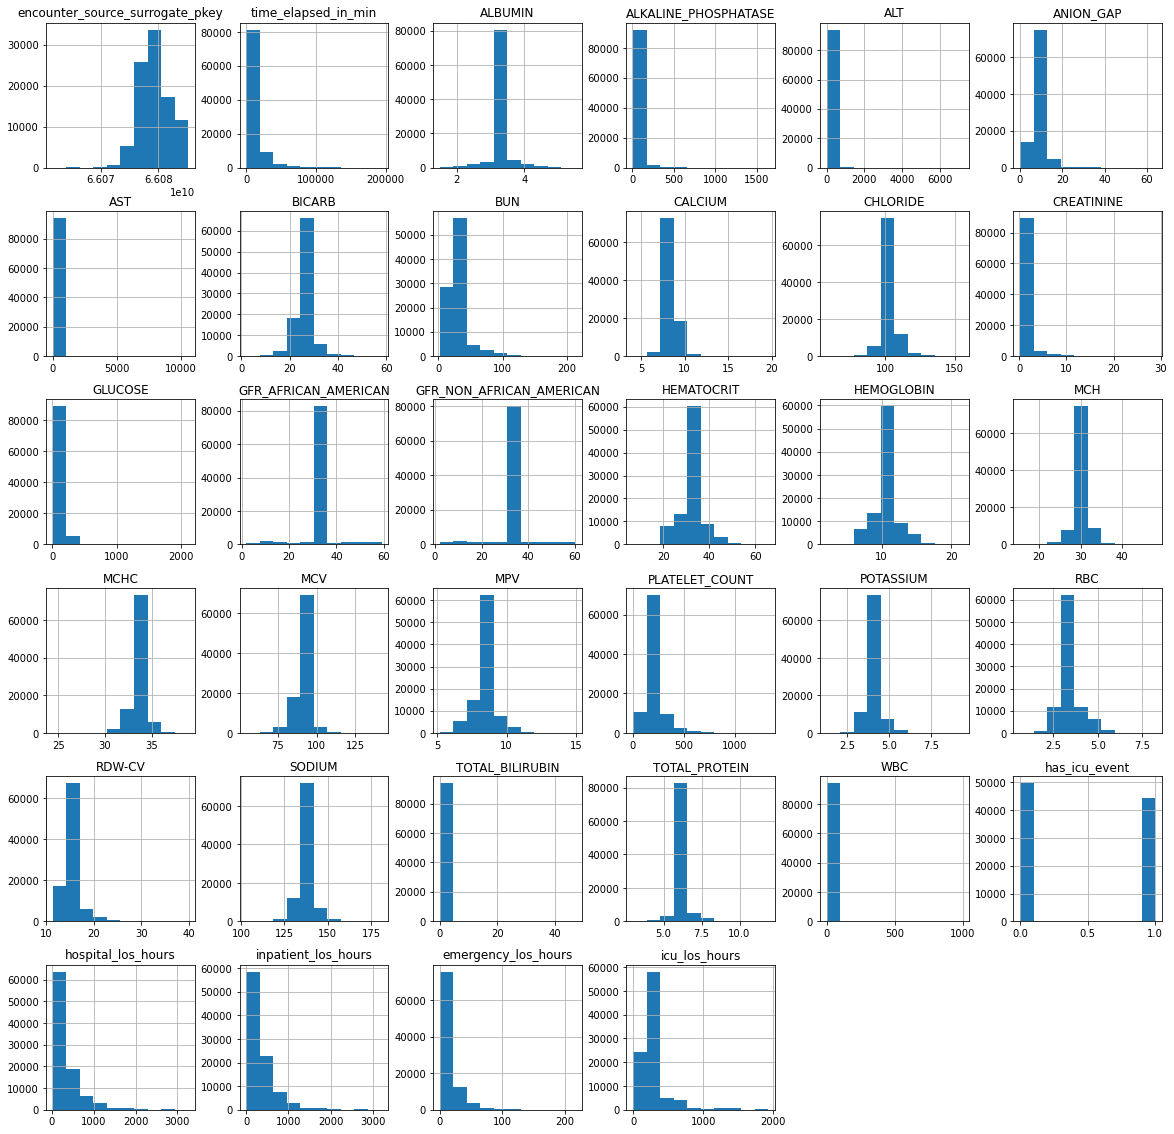

In [17]:
# --- Plot updated features
# for k in fts:
#     fts[k].hist(figsize=(20, 20))
_ = fts['ft'].hist(figsize=(20, 20))

Doing mean replacement changes the distribution significantly. Given that our end goal is to predict how features change overtime, processing the dataset in this manner is unsuitable.

## Plot PCA of features

In [18]:
from sklearn.decomposition import PCA

def plot_pca(ft, title):
    pca = PCA(n_components=2)
    X = pca.fit_transform(ft)
    plt.scatter(X[:, 0], X[:, 1])
    plt.title(title)
    plt.show()

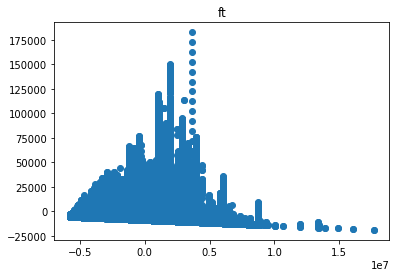

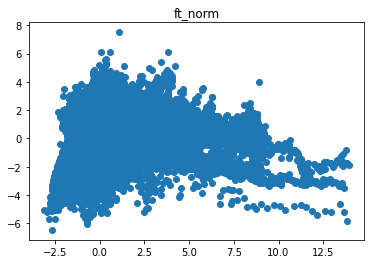

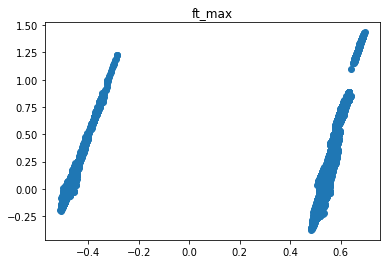

In [19]:
for k in fts:
    plot_pca(fts[k], k)

***

## Setup dataset class for analyzing patients

In [20]:
class EHR():
    def __init__(self, df):
        self.df = df
        
    def get_observations_for_patient(self, patient_id):
        assert type(patient_id) == str
        
        index = self.df['patient_id'] == patient_id
        rows  = self.df['patient_id'][index].index
        return self.df.iloc[rows]
    
    def get_all_patients(self):
        patients = self.df['patient_id']
        return np.unique(patients, return_counts=True)

In [21]:
ehr = EHR(df)

In [22]:
ehr.get_observations_for_patient(patient_id='Z5318141')

,"""encounter_time_elapsed""",encounter_source_surrogate_pkey,patient_id,resulted_at,resulted_at_tz,first_test_resulted_at,first_test_resulted_at_tz,time_elapsed_in_min,ALBUMIN,ALKALINE_PHOSPHATASE,...,TOTAL_PROTEIN,WBC,has_icu_event,hospital_los_hours,inpatient_los_hours,emergency_los_hours,icu_los_hours,discharge_disposition,department_name,level_of_care
4,66064469783-0.0,66064469783,Z5318141,2020-10-26 06:46:00,-05:00,2020-10-26 06:46:00,-05:00,0.0,NaN,NaN,...,NaN,4.5,False,52,52.0,NaN,NaN,Home Routine,UCI DH56 NEUROSTEPDOWN,IMU/Stepdown
5,66064469783-15.0,66064469783,Z5318141,2020-10-26 07:01:00,-05:00,2020-10-26 06:46:00,-05:00,15.0,4.4,78.0,...,7.4,NaN,False,52,52.0,NaN,NaN,Home Routine,UCI DH56 NEUROSTEPDOWN,IMU/Stepdown


In [23]:
# --- Find a patient who took the most tests
patients, patient_lab_visits = ehr.get_all_patients()

index = np.argmax(patient_lab_visits)
n_observations = patient_lab_visits[index]
patient = patients[index]

print(f"Patient: {patient} had {n_observations} different lab test observations.")

Patient: Z5628773 had 541 different lab test observations.


In [24]:
ehr.get_observations_for_patient(patient_id=patient)

,"""encounter_time_elapsed""",encounter_source_surrogate_pkey,patient_id,resulted_at,resulted_at_tz,first_test_resulted_at,first_test_resulted_at_tz,time_elapsed_in_min,ALBUMIN,ALKALINE_PHOSPHATASE,...,TOTAL_PROTEIN,WBC,has_icu_event,hospital_los_hours,inpatient_los_hours,emergency_los_hours,icu_los_hours,discharge_disposition,department_name,level_of_care
13199,66076468235-0.0,66076468235,Z5628773,2020-10-21 14:45:00,-05:00,2020-10-21 14:45:00,-05:00,0.0,4.4,58.0,...,7.2,NaN,True,1768,1768.0,NaN,1262.0,Hospice Facility,UCI DH74 MEDICAL ICU 2,ICU
13200,66076468235-69.0,66076468235,Z5628773,2020-10-21 15:54:00,-05:00,2020-10-21 14:45:00,-05:00,69.0,NaN,NaN,...,NaN,22.7,True,1768,1768.0,NaN,1262.0,Hospice Facility,UCI DH74 MEDICAL ICU 2,ICU
13201,66076468235-722.0,66076468235,Z5628773,2020-10-22 02:47:00,-05:00,2020-10-21 14:45:00,-05:00,722.0,3.9,52.0,...,6.6,NaN,True,1768,1768.0,NaN,1262.0,Hospice Facility,UCI DH74 MEDICAL ICU 2,ICU
13202,66076468235-810.0,66076468235,Z5628773,2020-10-22 04:15:00,-05:00,2020-10-21 14:45:00,-05:00,810.0,NaN,NaN,...,NaN,26.4,True,1768,1768.0,NaN,1262.0,Hospice Facility,UCI DH74 MEDICAL ICU 2,ICU
13203,66076468235-2184.0,66076468235,Z5628773,2020-10-23 03:09:00,-05:00,2020-10-21 14:45:00,-05:00,2184.0,3.9,60.0,...,6.4,NaN,True,1768,1768.0,NaN,1262.0,Hospice Facility,UCI DH74 MEDICAL ICU 2,ICU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,66076468235-105076.0,66076468235,Z5628773,2021-01-02 13:01:00,-06:00,2020-10-21 14:45:00,-05:00,105076.0,NaN,NaN,...,NaN,6.4,True,1768,1768.0,NaN,1262.0,Hospice Facility,UCI DH74 MEDICAL ICU 2,ICU
13736,66076468235-105213.0,66076468235,Z5628773,2021-01-02 15:18:00,-06:00,2020-10-21 14:45:00,-05:00,105213.0,NaN,NaN,...,NaN,NaN,True,1768,1768.0,NaN,1262.0,Hospice Facility,UCI DH74 MEDICAL ICU 2,ICU
13737,66076468235-105339.0,66076468235,Z5628773,2021-01-02 17:24:00,-06:00,2020-10-21 14:45:00,-05:00,105339.0,NaN,NaN,...,NaN,7.8,True,1768,1768.0,NaN,1262.0,Hospice Facility,UCI DH74 MEDICAL ICU 2,ICU
13738,66076468235-105361.0,66076468235,Z5628773,2021-01-02 17:46:00,-06:00,2020-10-21 14:45:00,-05:00,105361.0,NaN,NaN,...,NaN,NaN,True,1768,1768.0,NaN,1262.0,Hospice Facility,UCI DH74 MEDICAL ICU 2,ICU


In [25]:
patient_lab_visits

array([11,  2,  6, ...,  2,  2,  4])

In [26]:
def plot_patient_observations_distribution(patients, lab_visits):
    data = {p: plv for p, plv in zip(patients, lab_visits)}
    df = pd.Series(data)

    plt.figure(figsize=(40, 10))
    plt.bar(range(len(df)), df.values, align='center')
    plt.xticks(range(len(df)), df.index.values, size='large', rotation=80)
    plt.title("Histogram of patient lab observations", size='large')
    plt.ylabel("Number of lab observations", size='large')
    plt.xlabel("ID of patient", size='large')
    plt.show()

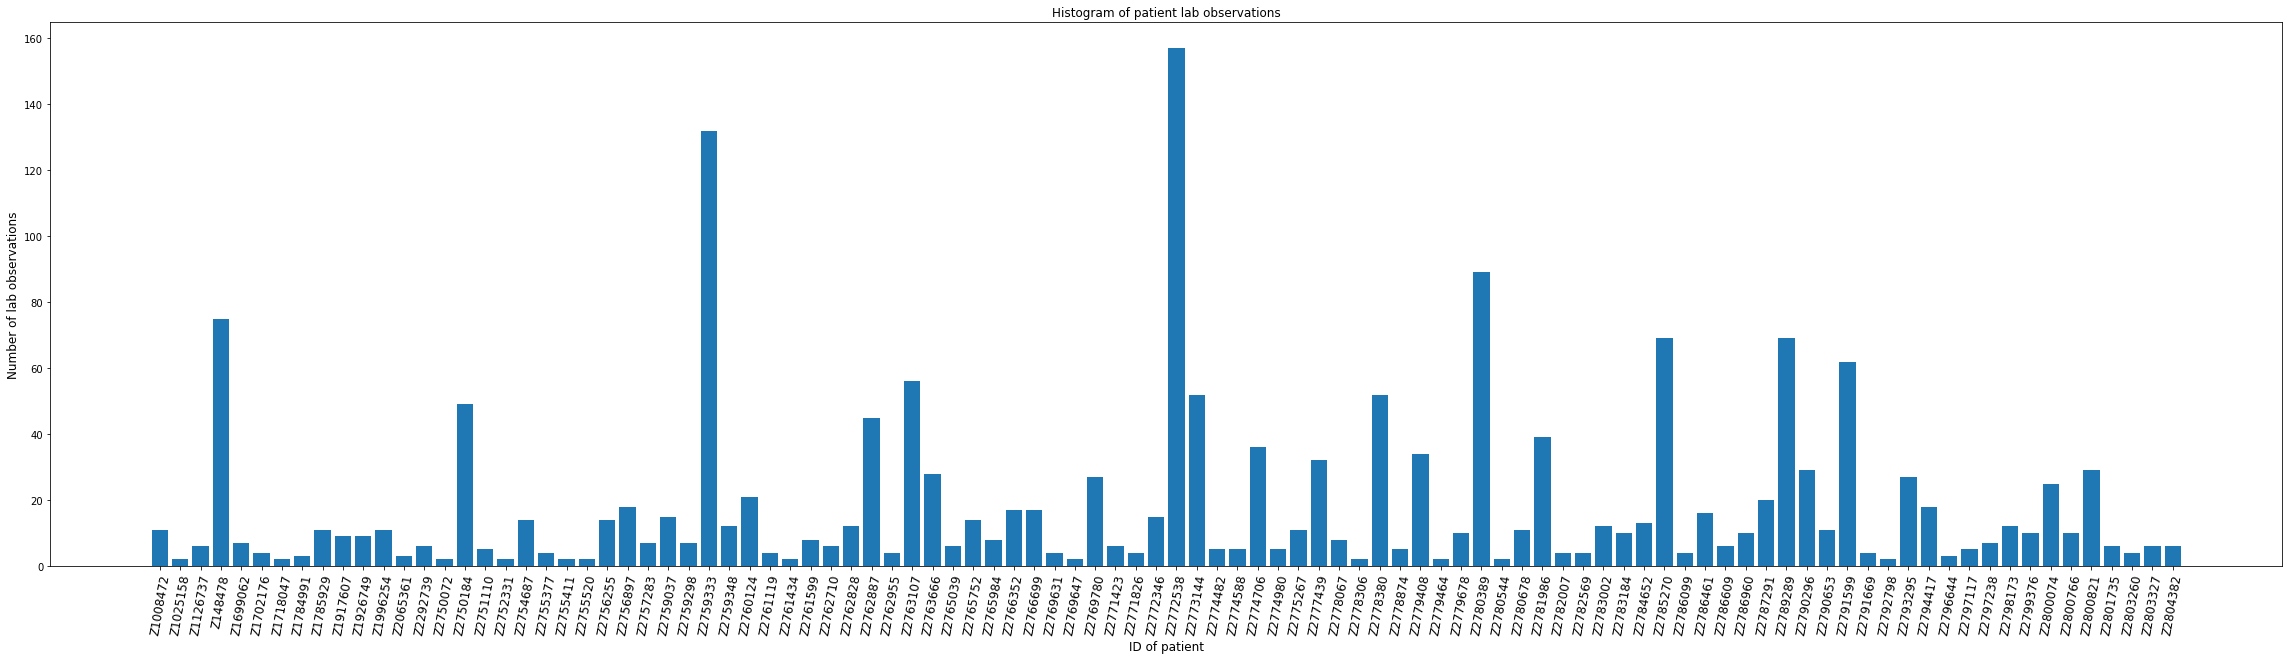

In [27]:
# --- Plot first 100 unique patients
plot_patient_observations_distribution(patients[:100], patient_lab_visits[:100])

In [28]:
# --- Get indices of most and max observed patients
max_index = np.argsort(-patient_lab_visits)
min_index = np.argsort(patient_lab_visits)

# --- Set a sample rate
n_samples = 100

most_observed_patients = {
    'patients': patients[max_index][: n_samples],
    'lab_visits': patient_lab_visits[max_index][: n_samples],
}
least_observed_patients = {
    'patients': patients[min_index][: n_samples],
    'lab_visits': patient_lab_visits[min_index][: n_samples],
}

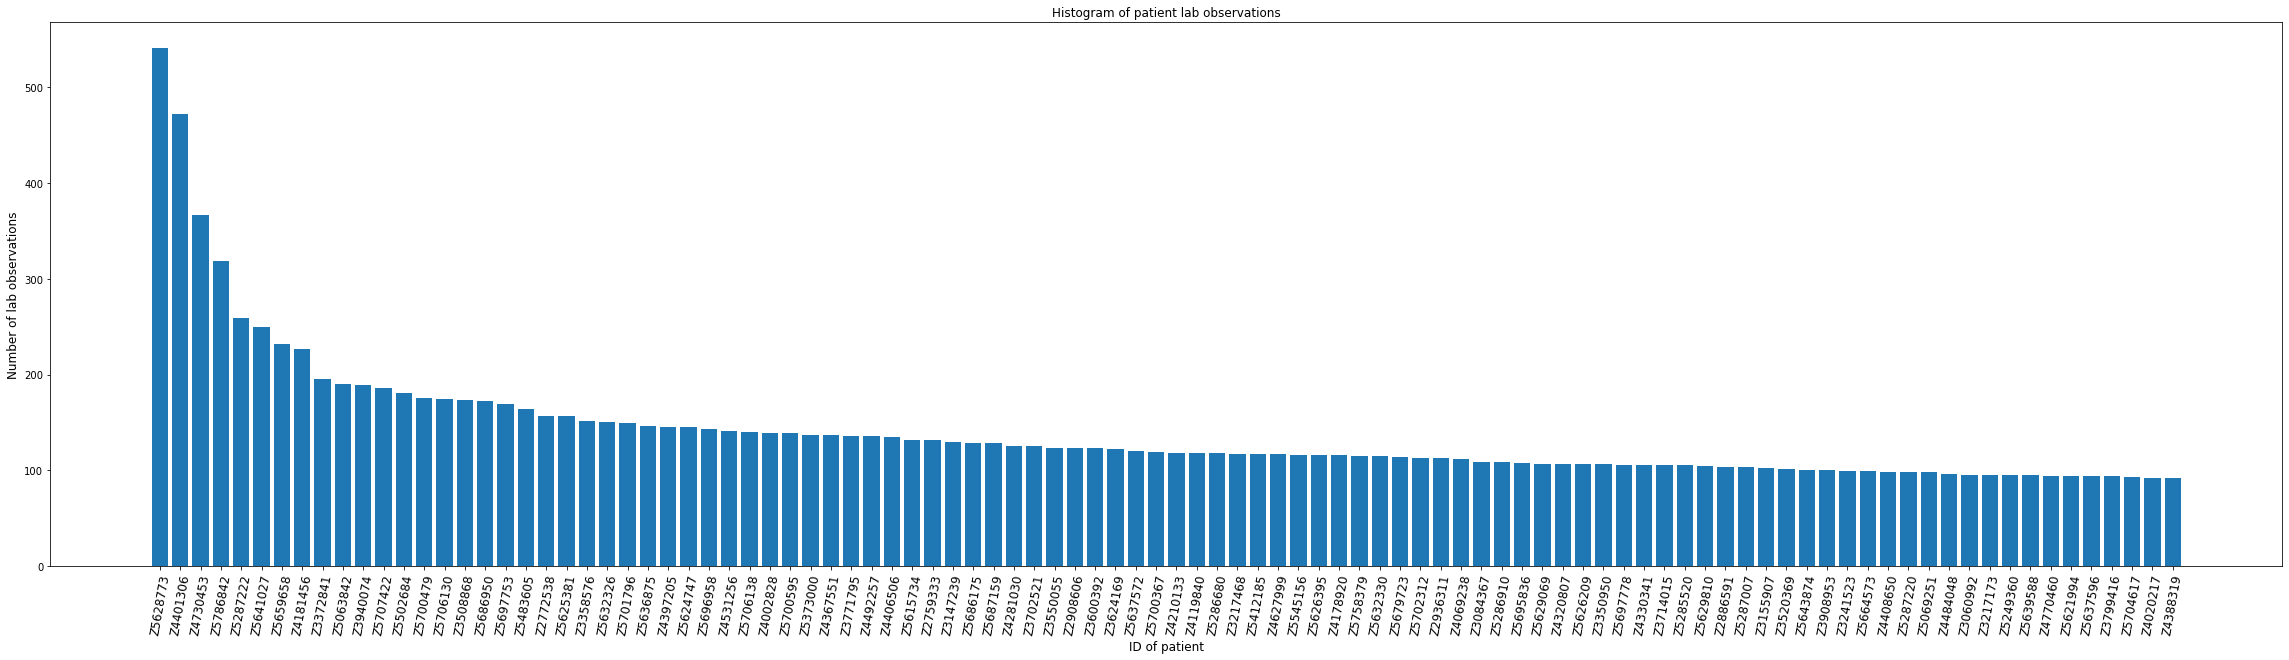

In [29]:
# --- Plot 100 of the most observed patients
plot_patient_observations_distribution(**most_observed_patients)

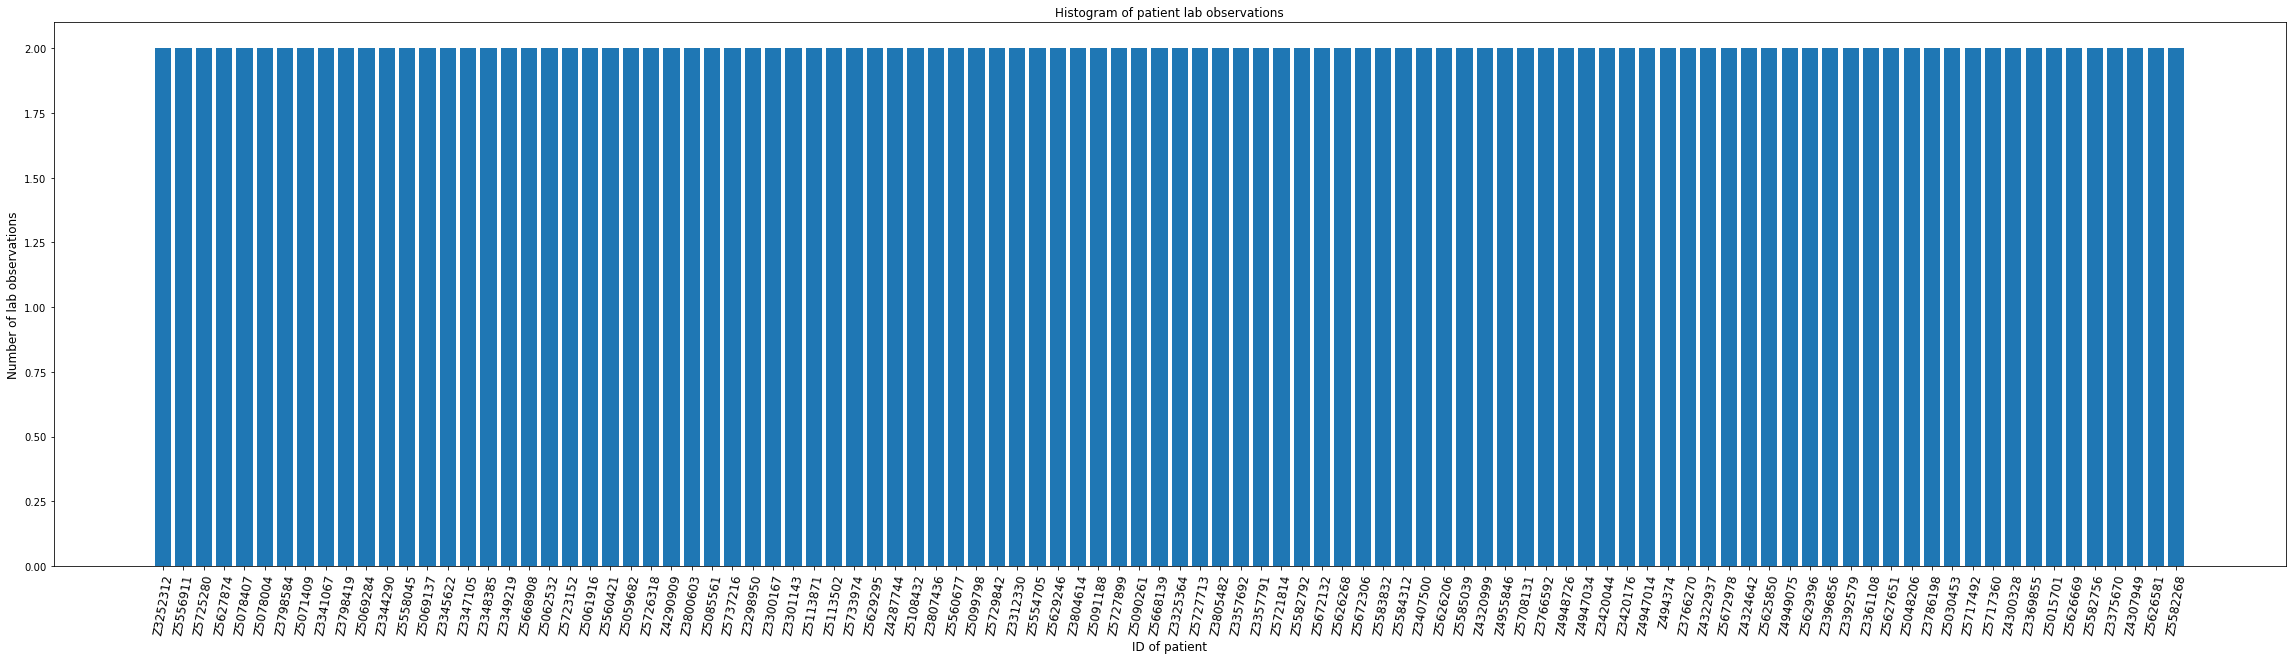

In [30]:
# --- Plot 100 of the least observed patients
plot_patient_observations_distribution(**least_observed_patients)